In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
data = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\data-flair projects\Detecting Parkinson’s Disease with XGBoost\\parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [75]:
#data.isnull().sum().sort_values(ascending=False)
#data.select_dtypes(exclude=np.number)
#dat = data.drop(['status'], axis=1)
#dat = data.drop([3], axis=0)
#dat = data.dropna(axis=1)
#dat = data.fillna(3, axis=0)


In [12]:
#data.info()
#data.describe()
#data.nunique()
data.status.unique()

array([1, 0], dtype=int64)

In [13]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [152]:
feat = data.drop(['status','name'], axis=1)
labels = data['status']

In [153]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(feat)
y = labels

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=7)

In [155]:
clf = XGBClassifier(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)
clf.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05, max_depth=6,
              min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9,
              reg_lambda=0.6, seed=42, silent=1, subsample=0.2)

In [156]:
pred = clf.predict(x_test)
print("Accuracy score is :{}".format(accuracy_score(y_test,pred)))

Accuracy score is :0.8974358974358975


In [157]:
clf.score(x_test, y_test)

0.8974358974358975

In [158]:
clf.predict_proba(x_test)[:10]

array([[0.32768464, 0.67231536],
       [0.21029264, 0.78970736],
       [0.01253778, 0.9874622 ],
       [0.03185427, 0.9681457 ],
       [0.03497714, 0.96502286],
       [0.0182724 , 0.9817276 ],
       [0.5601848 , 0.43981522],
       [0.17701554, 0.82298446],
       [0.02920043, 0.97079957],
       [0.00582498, 0.994175  ]], dtype=float32)

<AxesSubplot:>

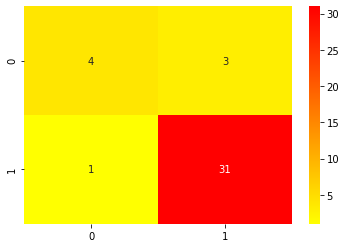

In [159]:
import seaborn as sns
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt= '.3g', cmap='autumn_r')

In [160]:
feat_imp = pd.Series(clf.feature_importances_, feat.columns).sort_values(ascending=False)

Text(0, 0.5, 'Feature Importance Score')

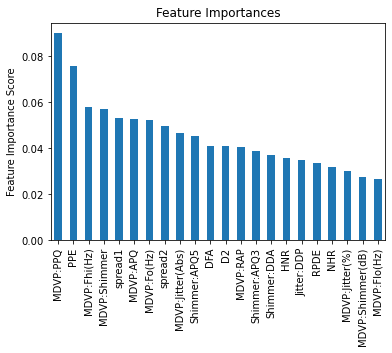

In [161]:
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [162]:
cv_score = cross_validate(clf, x, y, cv=5, scoring='roc_auc') 

In [163]:
cv_score

{'fit_time': array([2.17465639, 2.01375771, 1.95979071, 1.80888414, 1.93980289]),
 'score_time': array([0.00899577, 0.00899625, 0.00799656, 0.00699711, 0.0079968 ]),
 'test_score': array([0.93703704, 0.71481481, 0.97586207, 0.56896552, 0.92758621])}

In [164]:
cv_score['test_score'].mean()

0.82485312899106

In [165]:
print('Roc Auc score is : {}'.format(roc_auc_score(y_test,pred)))

Roc Auc score is : 0.7700892857142857
